In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
dataset1=pd.read_csv('/Users/gulcinecesasmaz/Desktop/Master_Studies/MDBLUE_DATA/Dataset1_MD_1Y_all.csv')
print(dataset1)
print(dataset1.columns)
print(dataset1.shape)

     Conductivity  timestamps  Water_Level  Dissolved_Oxygen   Ph  \
0           304.0  2024-06-13        43.53               2.3  7.4   
1           309.0  2024-06-15        43.08               2.2  7.6   
2           308.0  2024-06-16        42.87               2.2  7.6   
3           308.0  2024-06-17        42.68               2.2  7.6   
4           308.0  2024-06-18        42.54               2.2  7.6   
..            ...         ...          ...               ...  ...   
352         298.0  2025-06-08        40.77               2.1  7.8   
353         299.0  2025-06-09        40.78               2.1  7.8   
354         298.0  2025-06-10        40.81               2.1  7.8   
355         298.0  2025-06-11        40.81               2.1  7.8   
356         298.0  2025-06-12        40.84               2.1  7.8   

     Temperature        dk  
0           21.3       0.0  
1           21.3    2880.0  
2           21.3    4320.0  
3           21.3    5760.0  
4           21.3    7200.0

In [3]:
dataset=dataset1.drop(columns=['dk','Temperature','Conductivity','Ph'])

In [4]:
print(dataset)

     timestamps  Water_Level  Dissolved_Oxygen
0    2024-06-13        43.53               2.3
1    2024-06-15        43.08               2.2
2    2024-06-16        42.87               2.2
3    2024-06-17        42.68               2.2
4    2024-06-18        42.54               2.2
..          ...          ...               ...
352  2025-06-08        40.77               2.1
353  2025-06-09        40.78               2.1
354  2025-06-10        40.81               2.1
355  2025-06-11        40.81               2.1
356  2025-06-12        40.84               2.1

[357 rows x 3 columns]


In [5]:
df = dataset[['Water_Level','Dissolved_Oxygen', 'timestamps']]
df['timestamps'] = pd.to_datetime(df['timestamps'])
print(df.head())

   Water_Level  Dissolved_Oxygen timestamps
0        43.53               2.3 2024-06-13
1        43.08               2.2 2024-06-15
2        42.87               2.2 2024-06-16
3        42.68               2.2 2024-06-17
4        42.54               2.2 2024-06-18


##
su seviyesi ve oksije arasinda time series olmayan bir model (mesela linear regression or SVR).
su seviyesini train edip time series olarak, sonra testi tahmin etmek.
sonra test'teki su seviyesi tahminini kullanip linear regression'la oksijeni bulmaya calismak

## Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
#  for linear regression
test_days=10
X = df['Water_Level'].values.reshape(-1, 1)
Y = df['Dissolved_Oxygen'].values.reshape(-1, 1)

X_train = df['Water_Level'][:-test_days].values.reshape(-1, 1)
X_test = df['Water_Level'][-test_days:].values.reshape(-1, 1)

Y_train = df['Dissolved_Oxygen'][:-test_days].values.reshape(-1, 1)
Y_test = df['Dissolved_Oxygen'][-test_days:].values.reshape(-1, 1)

print(X_train)
print(Y_train)


[[43.53]
 [43.08]
 [42.87]
 [42.68]
 [42.54]
 [42.38]
 [42.25]
 [42.17]
 [42.09]
 [42.01]
 [41.93]
 [41.88]
 [41.83]
 [41.76]
 [41.71]
 [41.66]
 [41.7 ]
 [41.64]
 [41.78]
 [42.34]
 [43.13]
 [44.16]
 [44.67]
 [44.57]
 [44.07]
 [43.58]
 [43.25]
 [43.2 ]
 [43.67]
 [44.55]
 [45.21]
 [45.41]
 [43.03]
 [42.69]
 [42.45]
 [42.32]
 [42.42]
 [42.66]
 [42.59]
 [42.64]
 [42.93]
 [43.78]
 [45.02]
 [45.58]
 [45.35]
 [45.07]
 [45.17]
 [45.14]
 [44.99]
 [45.36]
 [47.49]
 [49.68]
 [51.04]
 [52.21]
 [53.14]
 [53.76]
 [54.  ]
 [53.68]
 [52.8 ]
 [51.56]
 [50.21]
 [48.9 ]
 [47.86]
 [47.04]
 [46.37]
 [45.81]
 [45.39]
 [45.05]
 [44.8 ]
 [44.51]
 [44.26]
 [43.21]
 [42.9 ]
 [42.64]
 [42.42]
 [42.24]
 [42.09]
 [41.95]
 [41.85]
 [41.79]
 [41.74]
 [41.7 ]
 [41.66]
 [41.61]
 [41.8 ]
 [42.04]
 [42.18]
 [42.42]
 [42.71]
 [42.98]
 [43.32]
 [43.72]
 [44.01]
 [43.86]
 [43.52]
 [43.13]
 [42.75]
 [42.47]
 [42.34]
 [42.9 ]
 [44.63]
 [45.61]
 [46.56]
 [48.6 ]
 [51.91]
 [56.5 ]
 [59.78]
 [61.35]
 [61.71]
 [60.95]
 [59.02]
 

In [8]:
## 1.adim

model = LinearRegression().fit(X_train, Y_train)

score = model.score(X_test, Y_test)
print("R^2 score:", score)
score2=model.score(X_train, Y_train)
print("R^2 score (train):", score2)

R^2 score: -1.43552100922984e+28
R^2 score (train): 0.06114977543608402


In [9]:
## 2.adim
X_ts_train= df['timestamps'][:-test_days].values
X_ts_test=df['timestamps'][-test_days:].values
print(X_ts_train.shape)
print(type(X_ts_train))
Y_ts_train=df['Water_Level'][:-test_days].values
Y_ts_test=df['Water_Level'][-test_days:].values
print(Y_ts_train.shape)
print(type(Y_ts_train))

(347,)
<class 'numpy.ndarray'>
(347,)
<class 'numpy.ndarray'>


In [10]:
Y_ts_train

array([43.53, 43.08, 42.87, 42.68, 42.54, 42.38, 42.25, 42.17, 42.09,
       42.01, 41.93, 41.88, 41.83, 41.76, 41.71, 41.66, 41.7 , 41.64,
       41.78, 42.34, 43.13, 44.16, 44.67, 44.57, 44.07, 43.58, 43.25,
       43.2 , 43.67, 44.55, 45.21, 45.41, 43.03, 42.69, 42.45, 42.32,
       42.42, 42.66, 42.59, 42.64, 42.93, 43.78, 45.02, 45.58, 45.35,
       45.07, 45.17, 45.14, 44.99, 45.36, 47.49, 49.68, 51.04, 52.21,
       53.14, 53.76, 54.  , 53.68, 52.8 , 51.56, 50.21, 48.9 , 47.86,
       47.04, 46.37, 45.81, 45.39, 45.05, 44.8 , 44.51, 44.26, 43.21,
       42.9 , 42.64, 42.42, 42.24, 42.09, 41.95, 41.85, 41.79, 41.74,
       41.7 , 41.66, 41.61, 41.8 , 42.04, 42.18, 42.42, 42.71, 42.98,
       43.32, 43.72, 44.01, 43.86, 43.52, 43.13, 42.75, 42.47, 42.34,
       42.9 , 44.63, 45.61, 46.56, 48.6 , 51.91, 56.5 , 59.78, 61.35,
       61.71, 60.95, 59.02, 56.59, 54.03, 51.31, 49.29, 48.01, 47.11,
       46.36, 45.7 , 45.1 , 44.59, 44.18, 43.85, 43.56, 43.32, 43.1 ,
       42.92, 42.76,

In [11]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

# Use auto_arima to select the best ARIMA order
stepwise_model = auto_arima(Y_ts_train, trace=True, error_action='ignore', suppress_warnings=True,)

print(stepwise_model.summary())

# Fit the ARIMA model with the selected order
order = stepwise_model.order
arima_model = ARIMA(Y_ts_train, order=order)
#arima_fitted = arima_model.fit()
#print(arima_fitted.summary())




/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=343.657, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1837.922, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=747.381, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1388.255, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3619.662, Time=0.00 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=408.613, Time=0.11 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=342.058, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=501.058, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=350.818, Time=0.03 sec


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=343.722, Time=0.09 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=341.753, Time=0.04 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=343.717, Time=0.05 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=345.739, Time=0.11 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.01 sec

Best model:  ARIMA(3,0,0)(0,0,0)[0] intercept
Total fit time: 0.636 seconds


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  347
Model:               SARIMAX(3, 0, 0)   Log Likelihood                -165.876
Date:                Thu, 04 Sep 2025   AIC                            341.753
Time:                        19:18:22   BIC                            360.999
Sample:                             0   HQIC                           349.416
                                - 347                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.4404      0.368      3.914      0.000       0.719       2.162
ar.L1          1.9323      0.016    118.676      0.000       1.900       1.964
ar.L2         -1.1418      0.046    -24.731      0.0

In [12]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import r2_score, mean_squared_error

# Use only the water level values for ARIMA
arima_model = ARIMA(Y_ts_train, order=(3,0,0))  # You can tune (p,d,q)
arima_fitted = arima_model.fit()

# Forecast for the test set length
arima_forecast = arima_fitted.forecast(steps=len(Y_ts_test))

# Calculate R^2 and RMSE
arima_r2 = r2_score(Y_ts_test, arima_forecast)
arima_rmse = mean_squared_error(Y_ts_test, arima_forecast)

print(f"ARIMA R² Score: {arima_r2:.4f}")
print(f"ARIMA RMSE: {arima_rmse:.4f}")

ARIMA R² Score: -1663.5897
ARIMA RMSE: 2.8448


In [13]:
## 3.adim
# Use the fitted ARIMA model from the previous cell to predict water levels
# for the test period (which corresponds to the last 71 days)
water_level_predictions = arima_fitted.forecast(steps=len(Y_ts_test))
water_level_pred_train = arima_fitted.predict(start=0, end=len(Y_ts_train)-1)

print(f"ARIMA model predictions shape: {water_level_predictions.shape}")
print(f"Test data shape: {Y_ts_test.shape}")

# Display some predictions
print(f"\nFirst 10 predicted water levels: {water_level_predictions[:10]}")
print(f"First 10 actual water levels: {Y_ts_test[:10]}")

# Calculate performance of water level predictions
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

water_level_r2 = r2_score(Y_ts_test, water_level_predictions)
water_level_rmse = np.sqrt(mean_squared_error(Y_ts_test, water_level_predictions))
water_level_mae = mean_absolute_error(Y_ts_test, water_level_predictions)

print(f"\n WATER LEVEL PREDICTION PERFORMANCE ")
print(f"R² Score: {water_level_r2:.4f}")
print(f"RMSE: {water_level_rmse:.4f}")
print(f"MAE: {water_level_mae:.4f}")




ARIMA model predictions shape: (10,)
Test data shape: (10,)

First 10 predicted water levels: [40.85638229 41.063683   41.35066266 41.68555027 42.04165624 42.39815738
 42.73967045 43.05552445 43.33898058 43.58648001]
First 10 actual water levels: [40.73 40.7  40.73 40.75 40.79 40.77 40.78 40.81 40.81 40.84]

 WATER LEVEL PREDICTION PERFORMANCE 
R² Score: -1663.5897
RMSE: 1.6866
MAE: 1.4407


In [14]:
# Step 4: Use the trained linear regression model to predict oxygen from predicted water levels


# Take the water level predictions from step 3 (cell 13)
predicted_water_levels = water_level_predictions  # This comes from the ARIMA forecast
oxygen_train_predictions = arima_fitted.predict(start=0, end=len(Y_ts_train)-1)

# Use the trained linear regression model from step 1 (cell 10) to predict oxygen
# Reshape the predictions to match the expected input format
predicted_water_levels_reshaped = predicted_water_levels.reshape(-1, 1)

# Predict dissolved oxygen using the trained linear regression model
oxygen_predictions = model.predict(predicted_water_levels_reshaped)

print(f"Predicted water levels shape: {predicted_water_levels.shape}")
print(f"Oxygen predictions shape: {oxygen_predictions.shape}")

# Display some predictions
print(f"\nFirst 10 predicted water levels: {predicted_water_levels[:10]}")
print(f"First 10 predicted oxygen levels: {oxygen_predictions.flatten()[:10]}")

# Get actual oxygen values for comparison (from the test set)
actual_oxygen_test = Y_test.flatten()  # Y_test from step 1

print(f"\nFirst 10 actual oxygen levels: {actual_oxygen_test[:10]}")

# Calculate final performance metrics for the complete pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

final_r2 = r2_score(actual_oxygen_test, oxygen_predictions)
final_rmse = np.sqrt(mean_squared_error(actual_oxygen_test, oxygen_predictions))
final_mae = mean_absolute_error(actual_oxygen_test, oxygen_predictions)


print(f"Pipeline: Time → Water Level (ARIMA) → Dissolved Oxygen (Linear Regression)")
print(f"Final R² Score: {final_r2:.4f}")
print(f"Final RMSE: {final_rmse:.4f}")
print(f"Final MAE: {final_mae:.4f}")


print(f"Step 1 - Direct Linear Regression (Water Level → Oxygen):")
print(f"  Test R²: {score:.4f}")
print(f"Step 2 - ARIMA (Time → Water Level):")
print(f"  R²: {arima_r2:.4f}")
print(f"Complete Pipeline (Time → Water Level → Oxygen):")
print(f"  Final R²: {final_r2:.4f}")



Predicted water levels shape: (10,)
Oxygen predictions shape: (10, 1)

First 10 predicted water levels: [40.85638229 41.063683   41.35066266 41.68555027 42.04165624 42.39815738
 42.73967045 43.05552445 43.33898058 43.58648001]
First 10 predicted oxygen levels: [2.15938728 2.17460079 2.19566182 2.22023875 2.24637287 2.27253599
 2.29759915 2.32077923 2.34158168 2.35974531]

First 10 actual oxygen levels: [2.1 2.1 2.1 2.1 2.1 2.1 2.1 2.1 2.1 2.1]
Pipeline: Time → Water Level (ARIMA) → Dissolved Oxygen (Linear Regression)
Final R² Score: -150856799785509795470797438976.0000
Final RMSE: 0.1725
Final MAE: 0.1589
Step 1 - Direct Linear Regression (Water Level → Oxygen):
  Test R²: -14355210092298398952914419712.0000
Step 2 - ARIMA (Time → Water Level):
  R²: -1663.5897
Complete Pipeline (Time → Water Level → Oxygen):
  Final R²: -150856799785509795470797438976.0000


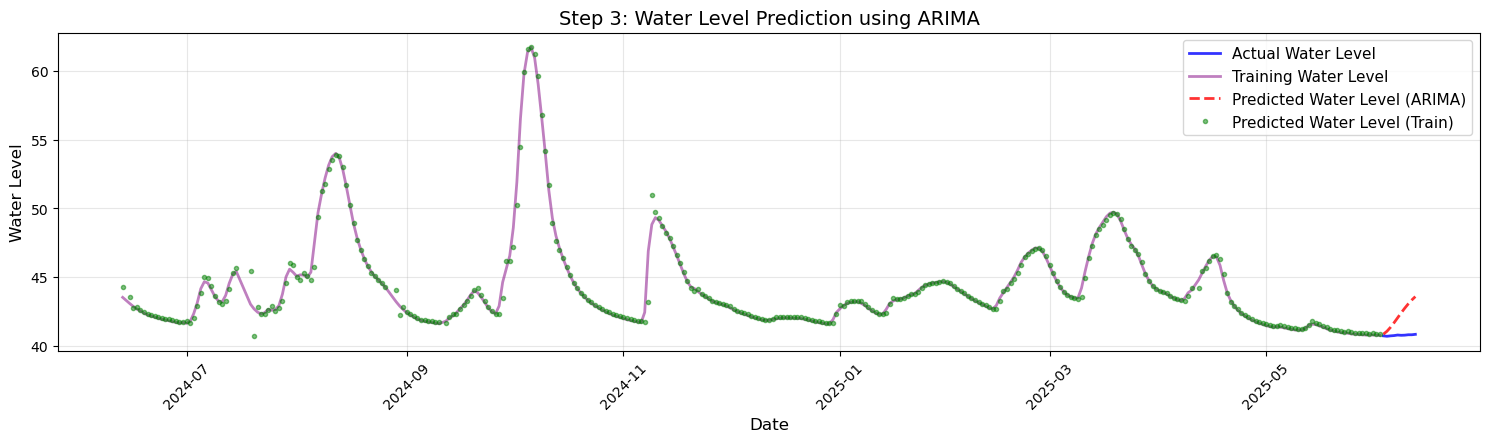


FINAL PERFORMANCE COMPARISON 
 Linear Regression (Water Level → Oxygen): R² = -14355210092298398952914419712.0000
Predicting Oxygen (Time → Water Level → Oxygen): R² = -150856799785509795470797438976.0000
Performance difference: -136501589693211403114952785920.0000


In [50]:
# Visualization of the complete pipeline results

plt.figure(figsize=(15, 12))

# Get timestamps for plotting
test_timestamps = df['timestamps'][-test_days:].values

# Plot 1: Water Level Predictions (Step 3)
plt.subplot(3, 1, 1)
plt.plot(test_timestamps, Y_ts_test, 'b-', label='Actual Water Level', linewidth=2, alpha=0.8)
plt.plot(X_ts_train, Y_ts_train, color='purple', label='Training Water Level', linewidth=2, alpha=0.5)
plt.plot(test_timestamps, predicted_water_levels, 'r--', label='Predicted Water Level (ARIMA)', linewidth=2, alpha=0.8)
plt.plot(X_ts_train, water_level_pred_train , '.g', label='Predicted Water Level (Train)', linewidth=3, alpha=0.5)
plt.title('Step 3: Water Level Prediction using ARIMA', fontsize=14)
plt.ylabel('Water Level', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

# Performance comparison summary
direct_r2 = score  # From step 1
print(f"\nFINAL PERFORMANCE COMPARISON ")
print(f" Linear Regression (Water Level → Oxygen): R² = {direct_r2:.4f}")
print(f"Predicting Oxygen (Time → Water Level → Oxygen): R² = {final_r2:.4f}")
print(f"Performance difference: {final_r2 - direct_r2:+.4f}")


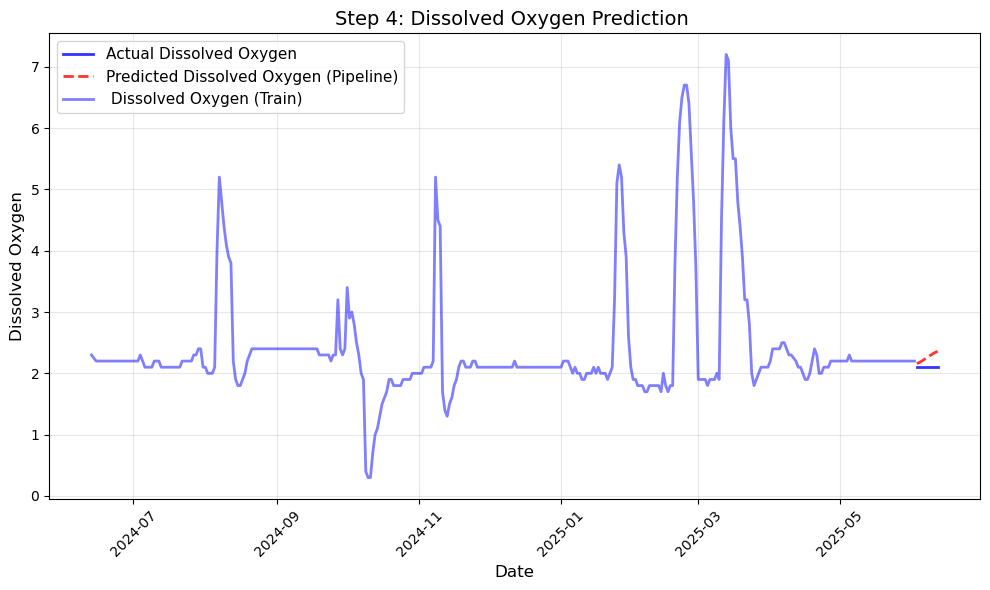

In [58]:
# Plot 2: Dissolved Oxygen Predictions (Step 4)
plt.figure(figsize=(10, 6))
plt.plot(test_timestamps, actual_oxygen_test, 'b', label='Actual Dissolved Oxygen', linewidth=2, alpha=0.8)
plt.plot()
plt.plot(test_timestamps, oxygen_predictions.flatten(), 'r', linestyle='--', label='Predicted Dissolved Oxygen (Pipeline)', linewidth=2, alpha=0.8)
plt.plot(X_ts_train, Y_train , color='blue', label=' Dissolved Oxygen (Train)', linewidth=2, alpha=0.5)
#plt.plot(X_ts_train, oxygen_train_predictions, '.g', label='Predicted Water Level (Train)', linewidth=3, alpha=0.5)
plt.title('Step 4: Dissolved Oxygen Prediction ', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Dissolved Oxygen', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

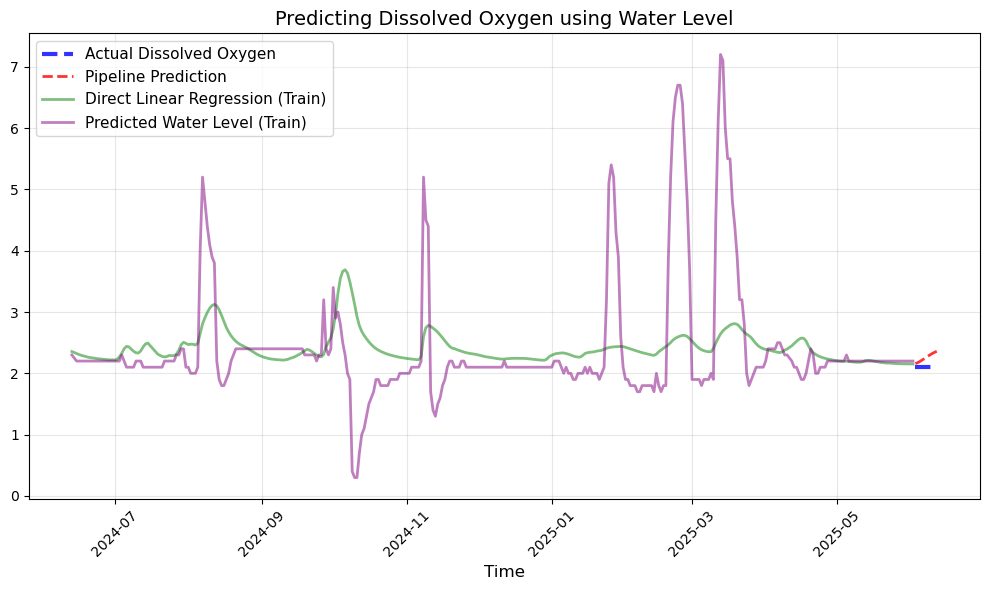

In [59]:
# Plot 3: Comparison with Direct Linear Regression
# Direct prediction using actual water levels
plt.figure(figsize=(10, 6))
direct_oxygen_pred = model.predict(X_test)
direct_train_oxygen_pred = model.predict(X_train)
plt.plot(test_timestamps, actual_oxygen_test, 'b',linestyle='--', label='Actual Dissolved Oxygen', linewidth=3, alpha=0.8)
#plt.plot(test_timestamps, direct_oxygen_pred.flatten(), 'purple', linestyle='-', label='Direct Linear Regression', linewidth=2, alpha=0.8)
plt.plot(test_timestamps, oxygen_predictions.flatten(), 'r', linestyle='--', label='Pipeline Prediction', linewidth=2, alpha=0.8)
plt.plot(X_ts_train, direct_train_oxygen_pred, color='green', linestyle='-', label='Direct Linear Regression (Train)', linewidth=2, alpha=0.5)
plt.plot(X_ts_train, Y_train , color='purple', label='Predicted Water Level (Train)', linewidth=2, alpha=0.5)

plt.title('Predicting Dissolved Oxygen using Water Level', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [18]:
# import joblib
# import pickle
# import json
# from datetime import datetime
# import os

# # Create a directory for saving models
# save_dir = '/Users/gulcinecesasmaz/Desktop/Master_Studies/MDBlue_Data/Linearegression_1ststep_saved_models'
# os.makedirs(save_dir, exist_ok=True)

# # Create timestamp for unique model naming
# timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# # 1. Save the complete model using joblib (recommended for sklearn models)
# model_path = f"{save_dir}/linear_regression_oxygen_model_{timestamp}.joblib"
# joblib.dump(model, model_path)
# print(f"✅ Linear regression model saved to: {model_path}")

# # 2. Alternative: Save using pickle
# pickle_path = f"{save_dir}/linear_regression_oxygen_model_{timestamp}.pkl"
# with open(pickle_path, 'wb') as f:
#     pickle.dump(model, f)
# print(f"✅ Model saved with pickle to: {pickle_path}")

# # 3. Save model parameters and metadata
# model_params = {
#     'model_type': 'LinearRegression',
#     'target_variable': 'Dissolved_Oxygen',
#     'input_variable': 'Water_Level',
#     'coefficients': model.coef_.tolist(),
#     'intercept': float(model.intercept_),
#     'r2_score': float(score),
#     'training_data_shape': {
#         'samples': len(X),
#         'features': X.shape[1]
#     },
#     'data_statistics': {
#         'water_level_mean': float(df['Water_Level'].mean()),
#         'water_level_std': float(df['Water_Level'].std()),
#         'water_level_min': float(df['Water_Level'].min()),
#         'water_level_max': float(df['Water_Level'].max()),
#         'dissolved_oxygen_mean': float(df['Dissolved_Oxygen'].mean()),
#         'dissolved_oxygen_std': float(df['Dissolved_Oxygen'].std()),
#         'dissolved_oxygen_min': float(df['Dissolved_Oxygen'].min()),
#         'dissolved_oxygen_max': float(df['Dissolved_Oxygen'].max())
#     },
#     'training_date': datetime.now().isoformat(),
#     'dataset_path': '/Users/gulcinecesasmaz/Desktop/Master_Studies/MDBLUE_DATA/Dataset1_MD_1Y_all.csv'
# }

# # Save parameters as JSON
# params_path = f"{save_dir}/linear_regression_oxygen_params_{timestamp}.json"
# with open(params_path, 'w') as f:
#     json.dump(model_params, f, indent=4)
# print(f"✅ Model parameters saved to: {params_path}")

# # 4. Save training data information
# data_info = {
#     'original_data_shape': df.shape,
#     'water_level_range': [float(df['Water_Level'].min()), float(df['Water_Level'].max())],
#     'dissolved_oxygen_range': [float(df['Dissolved_Oxygen'].min()), float(df['Dissolved_Oxygen'].max())],
#     'data_start_date': str(df['timestamps'].min()),
#     'data_end_date': str(df['timestamps'].max()),
#     'total_records': len(df),
#     'correlation': float(df['Water_Level'].corr(df['Dissolved_Oxygen'])),
#     'training_timestamps': df['timestamps'].dt.strftime('%Y-%m-%d %H:%M:%S').tolist(),  # Add this line
# }

# data_info_path = f"{save_dir}/linear_regression_oxygen_data_info_{timestamp}.json"
# with open(data_info_path, 'w') as f:
#     json.dump(data_info, f, indent=4)
# print(f"✅ Data info saved to: {data_info_path}")

# print(f"\n🎉 All model files saved successfully with timestamp: {timestamp}")
# print(f"📁 Save directory: {save_dir}")

# # Display model parameters
# print(f"\n📊 Model Parameters:")
# print(f"  - Coefficient (slope): {model.coef_[0]:.6f}")
# print(f"  - Intercept: {model.intercept_:.6f}")
# print(f"  - R² Score: {score:.6f}")
# print(f"  - Equation: Dissolved_Oxygen = {model.coef_[0]:.6f} * Water_Level + {model.intercept_:.6f}")

In [19]:
# def load_linear_regression_model(timestamp, save_dir='/Users/gulcinecesasmaz/Desktop/Master_Studies/MDBlue_Data/Linearegression_1ststep_saved_models'):
#     # Load the model
#     model_path = f"{save_dir}/linear_regression_oxygen_model_{timestamp}.joblib"
#     loaded_model = joblib.load(model_path)
#     print(f"✅ Model loaded from: {model_path}")
    
#     # Load parameters
#     params_path = f"{save_dir}/linear_regression_oxygen_params_{timestamp}.json"
#     with open(params_path, 'r') as f:
#         params = json.load(f)
#     print(f"✅ Parameters loaded from: {params_path}")
    
#     # Load data info
#     data_info_path = f"{save_dir}/linear_regression_oxygen_data_info_{timestamp}.json"
#     with open(data_info_path, 'r') as f:
#         data_info = json.load(f)
#     print(f"✅ Data info loaded from: {data_info_path}")
    
#     return {
#         'model': loaded_model,
#         'parameters': params,
#         'data_info': data_info,
#         'training_timestamps': df_reload['timestamps'].values,
#         'training_data': df_reload
#     }
#  # Reload original data to get timestamps
#     dataset1 = pd.read_csv(params['dataset_path'])
#     dataset = dataset1.drop(columns=['dk','Temperature','Conductivity','Ph'])
#     df_reload = dataset[['Water_Level','Dissolved_Oxygen', 'timestamps']]
#     df_reload['timestamps'] = pd.to_datetime(df_reload['timestamps'])
#     dataset1 = pd.read_csv(params['dataset_path'])
#     dataset = dataset1.drop(columns=['dk','Temperature','Conductivity','Ph'])
#     df_reload = dataset[['Water_Level','Dissolved_Oxygen', 'timestamps']]
#     df_reload['timestamps'] = pd.to_datetime(df_reload['timestamps'])
    
# # Usage:
# # loaded_components = load_linear_regression_model_with_timestamps("your_timestamp_here")
# # training_timestamps = loaded_components['training_timestamps']

# # Example usage:
# # loaded_components = load_linear_regression_model("20240816_143022")
# # loaded_model = loaded_components['model']
# # params = loaded_components['parameters']
# # data_info = loaded_components['data_info']

In [20]:
# # You already have this information in your data_info
# print("Data start date:", data_info['data_start_date'])
# print("Data end date:", data_info['data_end_date'])
# print("Total records:", data_info['total_records'])

# # To get the actual timestamp array, you need to reload the original data:
# dataset1 = pd.read_csv('/Users/gulcinecesasmaz/Desktop/Master_Studies/MDBLUE_DATA/Dataset1_MD_1Y_all.csv')
# dataset = dataset1.drop(columns=['dk','Temperature','Conductivity','Ph'])
# df_reload = dataset[['Water_Level','Dissolved_Oxygen', 'timestamps']]
# df_reload['timestamps'] = pd.to_datetime(df_reload['timestamps'])

# training_timestamps = df_reload['timestamps'].values
# print("Training timestamps from reloaded data:")
# print(f"Shape: {training_timestamps.shape}")
# print(f"First 10: {training_timestamps[:10]}")

2.adim time series

In [21]:
# your_timestamp = "20250823_153732"  # Replace this with your actual timestamp

# # Load the model
# loaded_components = load_linear_regression_model(your_timestamp)

# # Now you can access the loaded model
# loaded_model = loaded_components['model']
# params = loaded_components['parameters'] 
# data_info = loaded_components['data_info']

# print("✅ Model loaded successfully!")
# print(f"Model type: {params['model_type']}")
# print(f"R² Score: {params['r2_score']}")
# print(f"Equation: Dissolved_Oxygen = {params['coefficients'][0]:.6f} * Water_Level + {params['intercept']:.6f}")
# loaded_model = loaded_components['model']

In [22]:
# # Step 1: Get training timestamps from the saved linear regression model
# training_timestamps = data_info['training_timestamps']
# print(f"Number of training timestamps: {len(training_timestamps)}")

# # Convert string timestamps back to datetime objects for proper handling
# training_timestamps_dt = pd.to_datetime(training_timestamps)

# # Step 2: Create X_train_ts (timestamps as features) and Y_ts (water level values)
# # Convert timestamps to numerical values (e.g., timestamp as seconds since epoch)
# X_train_ts = training_timestamps_dt.astype('int64').values.reshape(-1, 1) // 10**9  # Convert to seconds
# Y_ts = df['Water_Level'].values

# print(f"X_train_ts shape: {X_train_ts.shape}")
# print(f"Y_ts shape: {Y_ts.shape}")
# print(f"X_train_ts first 5 values: {X_train_ts[:5].flatten()}")
# print(f"Y_ts first 5 values: {Y_ts[:5]}")

# # Step 3: Split into train and test sets for time series (80/20 split)
# split_idx = int(len(X_train_ts) * 0.8)

# X_ts_train = X_train_ts[:split_idx]
# X_ts_test = X_train_ts[split_idx:]
# Y_ts_train = Y_ts[:split_idx] 
# Y_ts_test = Y_ts[split_idx:]

# print(f"\nTrain set - X_ts_train shape: {X_ts_train.shape}, Y_ts_train shape: {Y_ts_train.shape}")
# print(f"Test set - X_ts_test shape: {X_ts_test.shape}, Y_ts_test shape: {Y_ts_test.shape}")

# # Step 4: Train a new linear regression model for time series (timestamps -> water level)
# from sklearn.linear_model import LinearRegression

# ts_model = LinearRegression()
# ts_model.fit(X_ts_train, Y_ts_train)

# # Step 5: Get train and test scores for the time series model
# train_score_ts = ts_model.score(X_ts_train, Y_ts_train)
# test_score_ts = ts_model.score(X_ts_test, Y_ts_test)

# print(f"\nTime Series Model (Timestamps -> Water Level):")
# print(f"Train R² score: {train_score_ts:.4f}")
# print(f"Test R² score: {test_score_ts:.4f}")

# # Step 6: Predict water levels using time series model
# Y_ts_train_pred = ts_model.predict(X_ts_train)
# Y_ts_test_pred = ts_model.predict(X_ts_test)

# # Step 7: Use the saved linear regression model to predict dissolved oxygen
# # from predicted water levels
# dissolved_oxygen_train_pred = loaded_model.predict(Y_ts_train_pred.reshape(-1, 1))
# dissolved_oxygen_test_pred = loaded_model.predict(Y_ts_test_pred.reshape(-1, 1))

# # Step 8: Calculate final scores (timestamps -> water level -> dissolved oxygen)
# actual_dissolved_oxygen_train = df['Dissolved_Oxygen'].values[:split_idx]
# actual_dissolved_oxygen_test = df['Dissolved_Oxygen'].values[split_idx:]

# from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# final_train_r2 = r2_score(actual_dissolved_oxygen_train, dissolved_oxygen_train_pred)
# final_test_r2 = r2_score(actual_dissolved_oxygen_test, dissolved_oxygen_test_pred)

# final_train_rmse = np.sqrt(mean_squared_error(actual_dissolved_oxygen_train, dissolved_oxygen_train_pred))
# final_test_rmse = np.sqrt(mean_squared_error(actual_dissolved_oxygen_test, dissolved_oxygen_test_pred))

# print(f"\nFinal Model Performance (Timestamps -> Water Level -> Dissolved Oxygen):")
# print(f"Train R² score: {final_train_r2:.4f}")
# print(f"Test R² score: {final_test_r2:.4f}")
# print(f"Train RMSE: {final_train_rmse:.4f}")
# print(f"Test RMSE: {final_test_rmse:.4f}")

# # Step 9: Visualize the results
# plt.figure(figsize=(15, 12))

# # Plot 1: Time series model (timestamps -> water level)
# plt.subplot(3, 1, 1)
# plt.plot(training_timestamps_dt[:split_idx], Y_ts_train, 'b-', label='Actual Water Level (Train)', alpha=0.7)
# plt.plot(training_timestamps_dt[:split_idx], Y_ts_train_pred, 'r--', label='Predicted Water Level (Train)', alpha=0.7)
# plt.plot(training_timestamps_dt[split_idx:], Y_ts_test, 'g-', label='Actual Water Level (Test)', alpha=0.7)
# plt.plot(training_timestamps_dt[split_idx:], Y_ts_test_pred, 'orange', linestyle='--', label='Predicted Water Level (Test)', alpha=0.7)
# plt.title('Time Series Model: Timestamps → Water Level')
# plt.ylabel('Water Level')
# plt.legend()
# plt.grid(True, alpha=0.3)

# # Plot 2: Linear regression model (water level -> dissolved oxygen)
# plt.subplot(3, 1, 2)
# plt.scatter(Y_ts_train, actual_dissolved_oxygen_train, alpha=0.6, label='Train Data', s=20)
# plt.scatter(Y_ts_test, actual_dissolved_oxygen_test, alpha=0.6, label='Test Data', s=20)
# water_range = np.linspace(df['Water_Level'].min(), df['Water_Level'].max(), 100).reshape(-1, 1)
# oxygen_pred_range = loaded_model.predict(water_range)
# plt.plot(water_range, oxygen_pred_range, 'r-', linewidth=2, label='Linear Regression')
# plt.xlabel('Water Level')
# plt.ylabel('Dissolved Oxygen')
# plt.title('Linear Regression Model: Water Level → Dissolved Oxygen')
# plt.legend()
# plt.grid(True, alpha=0.3)

# # Plot 3: Final predictions (timestamps -> dissolved oxygen)
# plt.subplot(3, 1, 3)
# plt.plot(training_timestamps_dt[:split_idx], actual_dissolved_oxygen_train, 'b-', label='Actual Dissolved Oxygen (Train)', alpha=0.7)
# plt.plot(training_timestamps_dt[:split_idx], dissolved_oxygen_train_pred, 'r--', label='Predicted Dissolved Oxygen (Train)', alpha=0.7)
# plt.plot(training_timestamps_dt[split_idx:], actual_dissolved_oxygen_test, 'g-', label='Actual Dissolved Oxygen (Test)', alpha=0.7)
# plt.plot(training_timestamps_dt[split_idx:], dissolved_oxygen_test_pred, 'orange', linestyle='--', label='Predicted Dissolved Oxygen (Test)', alpha=0.7)
# plt.title('Final Model: Timestamps → Water Level → Dissolved Oxygen')
# plt.xlabel('Timestamps')
# plt.ylabel('Dissolved Oxygen')
# plt.legend()
# plt.grid(True, alpha=0.3)

# plt.tight_layout()
# plt.show()